In [92]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv('Data.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [94]:
# Describing Data set 
df.describe(include = "all")

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [95]:
# Checking Non Null Count and Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [96]:
# Checking if there is any duplicate values
duplicate = df.duplicated().sum()
duplicate

4

In [97]:
df[df.duplicated()]

,Company,Age,Salary,Place,Country,Gender
84,CTS,43.0,NaN,Mumbai,India,0
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,NaN,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [98]:
#Remove duplicate rows from table
df1=df.drop_duplicates()
df1

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      127 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


In [100]:
# Checking if there is any missing Data
missing_value = df1.isnull().sum()
missing_value

Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [101]:
# Checking Unique Data
unique = df1.nunique()
unique

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

In [102]:
# Display the empty value in Age column
df1[pd.isnull(df1['Age'])]

,Company,Age,Salary,Place,Country,Gender
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
23,Infosys,NaN,5835.0,Cochin,India,0
24,TCS,NaN,7084.0,Chennai,India,1
41,Infosys,NaN,5000.0,NaN,India,0
42,TCS,NaN,6000.0,NaN,India,0
59,Infosys,NaN,5835.0,Mumbai,India,0
60,TCS,NaN,7084.0,Calcutta,India,0
77,Infosys,NaN,5000.0,Hyderabad,India,0
78,TCS,NaN,6000.0,Calcutta,India,0


In [103]:
# Replacing the value 0 in age as NaN
df1['Age']=df1['Age'].fillna(0)

C:\Users\Kiran\AppData\Local\Temp\ipykernel_29780\1379082385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age']=df1['Age'].fillna(0)


In [104]:
# Replacing mean value to empty Salary column
df1['Salary']=df1['Salary'].fillna(df1['Salary'].mean())

C:\Users\Kiran\AppData\Local\Temp\ipykernel_29780\4207797655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Salary']=df1['Salary'].fillna(df1['Salary'].mean())


In [105]:
df1['Place'].mode()

0    Mumbai
Name: Place, dtype: object

In [106]:
# Replacing mode value to empty Placce column

df1['Place']=df1['Place'].fillna('Mumbai')

C:\Users\Kiran\AppData\Local\Temp\ipykernel_29780\460687512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Place']=df1['Place'].fillna('Mumbai')


In [107]:
df1.isnull().sum()

Company    8
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


# Find Outliers

In [109]:
Q1 = df1['Salary'].quantile(0.25)
Q2 = df1['Salary'].quantile(0.50)
Q3 = df1['Salary'].quantile(0.75)
Q1, Q2, Q3

(3045.0, 5283.471074380165, 7084.0)

In [110]:
IQR = Q3 - Q1
IQR

4039.0

In [111]:
lower_whisker = Q1-1.5*IQR
lower_whisker

-3013.5

In [112]:
upper_whisker = Q3+1.5*IQR
upper_whisker

13142.5

In [113]:
non_outliers = df1[(df1.Salary > -3013.5) & (df1.Salary < 13142.5)]
non_outliers

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [114]:
m = df1.Salary.mean()
s = df1.Salary.std()
# Z Score = (x - m)/s
# Z score with outliers
df1['zscore'] = (df1.Salary - m) / s
df1

C:\Users\Kiran\AppData\Local\Temp\ipykernel_29780\2761153415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore'] = (df1.Salary - m) / s


,Company,Age,Salary,Place,Country,Gender,zscore
0,TCS,20.0,5283.471074,Chennai,India,0,0.000000
1,Infosys,30.0,5283.471074,Mumbai,India,0,0.000000
2,TCS,35.0,2300.000000,Calcutta,India,0,-1.259725
3,Infosys,40.0,3000.000000,Delhi,India,0,-0.964161
4,TCS,23.0,4000.000000,Mumbai,India,0,-0.541926
...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0,1.232305
143,TCS,33.0,9024.000000,Calcutta,India,1,1.579382
145,Infosys,44.0,4034.000000,Delhi,India,1,-0.527570
146,TCS,33.0,5034.000000,Mumbai,India,1,-0.105335


In [115]:
# Remove outliers using Z-scores
zscore_non_outliers = df1[(df1['zscore'] >= -3) & (df1['zscore'] <= 3)]
zscore_non_outliers

,Company,Age,Salary,Place,Country,Gender,zscore
0,TCS,20.0,5283.471074,Chennai,India,0,0.000000
1,Infosys,30.0,5283.471074,Mumbai,India,0,0.000000
2,TCS,35.0,2300.000000,Calcutta,India,0,-1.259725
3,Infosys,40.0,3000.000000,Delhi,India,0,-0.964161
4,TCS,23.0,4000.000000,Mumbai,India,0,-0.541926
...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0,1.232305
143,TCS,33.0,9024.000000,Calcutta,India,1,1.579382
145,Infosys,44.0,4034.000000,Delhi,India,1,-0.527570
146,TCS,33.0,5034.000000,Mumbai,India,1,-0.105335


In [116]:
df2 = non_outliers[(non_outliers.Age > 40) & (non_outliers.Salary < 5000)]
df2

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


In [117]:
df3 = df2.drop(['Company','Place','Country','Gender'],axis=1)
df3

,Age,Salary
21,50.0,3184.0
32,45.0,4034.0
39,41.0,3000.0
50,41.0,3000.0
57,51.0,3184.0
68,43.0,4034.0
75,44.0,3000.0
86,41.0,3000.0
93,54.0,3184.0
104,44.0,4034.0


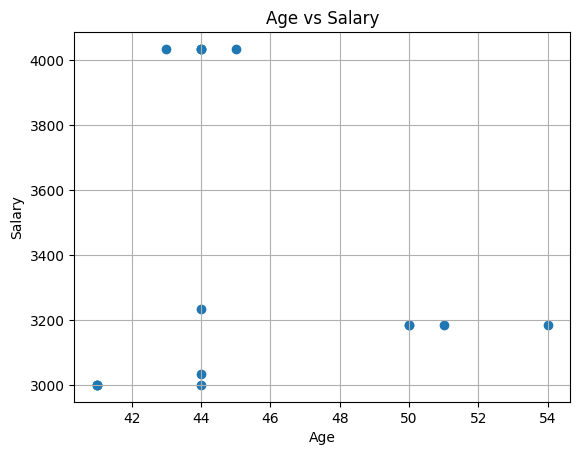

In [118]:
# Scatter plot
plt.scatter(df3['Age'], df3['Salary'])
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

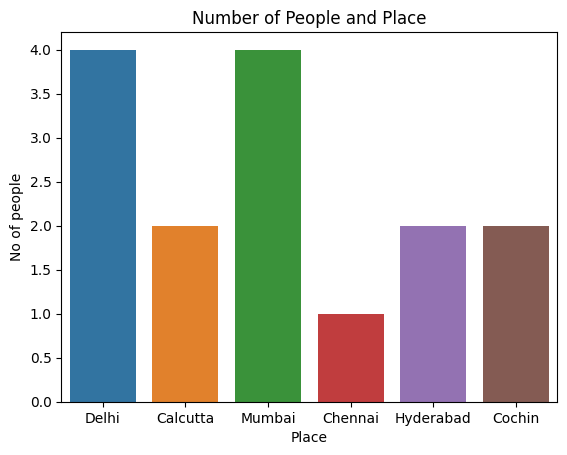

In [119]:
# Count plot
sns.countplot(x = 'Place',data = df2)
plt.ylabel('No of people')
plt.title('Number of People and Place')
plt.show()

# One Hot Encoding

In [120]:
df_one_hot_encode = pd.get_dummies(data = df2, columns = ["Company","Place","Country"])
df_one_hot_encode

,Age,Salary,Gender,Company_CTS,Company_Infosys,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Country_India
21,50.0,3184.0,0,False,True,False,False,False,True,False,False,True
32,45.0,4034.0,0,False,True,True,False,False,False,False,False,True
39,41.0,3000.0,0,False,True,False,False,False,False,False,True,True
50,41.0,3000.0,0,False,True,False,True,False,False,False,False,True
57,51.0,3184.0,0,False,True,False,False,False,False,True,False,True
68,43.0,4034.0,0,False,True,False,False,False,False,False,True,True
75,44.0,3000.0,0,False,True,False,False,True,False,False,False,True
86,41.0,3000.0,0,False,True,False,False,False,True,False,False,True
93,54.0,3184.0,0,False,True,False,False,False,False,False,True,True
104,44.0,4034.0,0,False,True,False,False,False,True,False,False,True


In [121]:
from sklearn.preprocessing import OneHotEncoder

In [122]:
cols_to_encoded = ["Company","Place","Country"]
new_encoded_cols_names = []
cols_to_encoded

['Company', 'Place', 'Country']

In [123]:
# Create a list of new columns names
for col in cols_to_encoded:
    new_encoded_cols_names += [f"is_{category}" for category in df2[col].unique().tolist()]
print(new_encoded_cols_names)

['is_Infosys', 'is_CTS', 'is_Delhi', 'is_Calcutta', 'is_Mumbai', 'is_Chennai', 'is_Hyderabad', 'is_Cochin', 'is_India']


In [124]:
# Inititalize and fit One Hot Encoder class from sklearn
one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoded_cols = one_hot_encoder.fit_transform(df2[cols_to_encoded])

C:\Users\Kiran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [125]:
encoded_cols

array([[0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.]])

In [126]:
# As the output of the above transformer would be a sparse matrix, we need to convert it back to Pandas dataframe
df2_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols_names)
df2_one_hot_encoded = df2.join(df2_encoded)

In [127]:
df2_one_hot_encoded

,Company,Age,Salary,Place,Country,Gender,is_Infosys,is_CTS,is_Delhi,is_Calcutta,is_Mumbai,is_Chennai,is_Hyderabad,is_Cochin,is_India
21,Infosys,50.0,3184.0,Delhi,India,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Infosys,45.0,4034.0,Calcutta,India,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Infosys,41.0,3000.0,Mumbai,India,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Infosys,41.0,3000.0,Chennai,India,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Infosys,51.0,3184.0,Hyderabad,India,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Infosys,43.0,4034.0,Mumbai,India,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,Infosys,44.0,3000.0,Cochin,India,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,Infosys,41.0,3000.0,Delhi,India,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Infosys,54.0,3184.0,Mumbai,India,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Infosys,44.0,4034.0,Delhi,India,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df2:
    df2[i] = label_encoder.fit_transform(df2[i])

C:\Users\Kiran\AppData\Local\Temp\ipykernel_29780\1236986049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = label_encoder.fit_transform(df2[i])
C:\Users\Kiran\AppData\Local\Temp\ipykernel_29780\1236986049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = label_encoder.fit_transform(df2[i])
C:\Users\Kiran\AppData\Local\Temp\ipykernel_29780\1236986049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [129]:
df2

,Company,Age,Salary,Place,Country,Gender
21,1,4,2,3,0,0
32,1,3,4,0,0,0
39,1,0,0,5,0,0
50,1,0,0,1,0,0
57,1,5,2,4,0,0
68,1,1,4,5,0,0
75,1,2,0,2,0,0
86,1,0,0,3,0,0
93,1,6,2,5,0,0
104,1,2,4,3,0,0


In [130]:
df2.Company.value_counts()

Company
1    14
0     1
Name: count, dtype: int64

In [131]:
df2.Place.value_counts()

Place
3    4
5    4
0    2
4    2
2    2
1    1
Name: count, dtype: int64

In [132]:
df2.Country.value_counts()

Country
0    15
Name: count, dtype: int64

# Feature Scaling

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df2)

# Transform the data
scaled_data = scaler.transform(df2)

# Print the scaled data
print(scaled_data)

[[ 0.26726124  0.95870624 -0.08406627  0.          0.         -0.26726124]
 [ 0.26726124  0.38348249  1.17692778 -1.79284291  0.         -0.26726124]
 [ 0.26726124 -1.34218873 -1.34506033  1.19522861  0.         -0.26726124]
 [ 0.26726124 -1.34218873 -1.34506033 -1.19522861  0.         -0.26726124]
 [ 0.26726124  1.53392998 -0.08406627  0.5976143   0.         -0.26726124]
 [ 0.26726124 -0.76696499  1.17692778  1.19522861  0.         -0.26726124]
 [ 0.26726124 -0.19174125 -1.34506033 -0.5976143   0.         -0.26726124]
 [ 0.26726124 -1.34218873 -1.34506033  0.          0.         -0.26726124]
 [ 0.26726124  2.10915372 -0.08406627  1.19522861  0.         -0.26726124]
 [ 0.26726124 -0.19174125  1.17692778  0.          0.         -0.26726124]
 [ 0.26726124 -0.19174125  0.54643076  1.19522861  0.         -0.26726124]
 [ 0.26726124  0.95870624 -0.08406627 -1.79284291  0.         -0.26726124]
 [-3.74165739 -0.19174125 -0.7145633  -0.5976143   0.         -0.26726124]
 [ 0.26726124 -0.19174125

In [135]:
from sklearn.preprocessing import MinMaxScaler 

In [136]:
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df2)

# Transform the data
scaled_data = scaler.transform(df2)

# Print the scaled data
print(scaled_data)

[[1.         0.66666667 0.5        0.6        0.         0.        ]
 [1.         0.5        1.         0.         0.         0.        ]
 [1.         0.         0.         1.         0.         0.        ]
 [1.         0.         0.         0.2        0.         0.        ]
 [1.         0.83333333 0.5        0.8        0.         0.        ]
 [1.         0.16666667 1.         1.         0.         0.        ]
 [1.         0.33333333 0.         0.4        0.         0.        ]
 [1.         0.         0.         0.6        0.         0.        ]
 [1.         1.         0.5        1.         0.         0.        ]
 [1.         0.33333333 1.         0.6        0.         0.        ]
 [1.         0.33333333 0.75       1.         0.         0.        ]
 [1.         0.66666667 0.5        0.         0.         0.        ]
 [0.         0.33333333 0.25       0.4        0.         0.        ]
 [1.         0.33333333 1.         0.8        0.         0.        ]
 [1.         0.33333333 1.        